In [66]:
#Importing Libraries we will use for data processing and ML model 

import pandas as pd
from sodapy import Socrata
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time


In [2]:
# Importing Modules for The GUI

from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image

In [3]:
#importing map distance modules

from geopy.geocoders import Nominatim
from geopy import distance

In [4]:
# Get data from API and load into pandas dataframe

client = Socrata("data.cityofnewyork.us", None)

results = client.get("kxp8-n2sj", limit = 2000000)

taxi_df = pd.DataFrame.from_records(results)
taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01T00:28:15.000,2020-01-01T00:33:03.000,1,1.20,1,N,238,239,1,6,3,0.5,1.47,0,0.3,11.27,2.5
1,1,2020-01-01T00:35:39.000,2020-01-01T00:43:04.000,1,1.20,1,N,239,238,1,7,3,0.5,1.5,0,0.3,12.3,2.5
2,1,2020-01-01T00:47:41.000,2020-01-01T00:53:52.000,1,0.60,1,N,238,238,1,6,3,0.5,1,0,0.3,10.8,2.5
3,1,2020-01-01T00:55:23.000,2020-01-01T01:00:14.000,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0,0.3,8.16,0
4,2,2020-01-01T00:01:58.000,2020-01-01T00:04:16.000,1,0.00,1,N,193,193,2,3.5,0.5,0.5,0,0,0.3,4.8,0


In [5]:
taxi_df.head(30)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01T00:28:15.000,2020-01-01T00:33:03.000,1,1.20,1,N,238,239,1,6,3,0.5,1.47,0,0.3,11.27,2.5
1,1,2020-01-01T00:35:39.000,2020-01-01T00:43:04.000,1,1.20,1,N,239,238,1,7,3,0.5,1.5,0,0.3,12.3,2.5
2,1,2020-01-01T00:47:41.000,2020-01-01T00:53:52.000,1,0.60,1,N,238,238,1,6,3,0.5,1,0,0.3,10.8,2.5
3,1,2020-01-01T00:55:23.000,2020-01-01T01:00:14.000,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0,0.3,8.16,0
4,2,2020-01-01T00:01:58.000,2020-01-01T00:04:16.000,1,0.00,1,N,193,193,2,3.5,0.5,0.5,0,0,0.3,4.8,0
5,2,2020-01-01T00:09:44.000,2020-01-01T00:10:37.000,1,0.03,1,N,7,193,2,2.5,0.5,0.5,0,0,0.3,3.8,0
6,2,2020-01-01T00:39:25.000,2020-01-01T00:39:29.000,1,0.00,1,N,193,193,1,2.5,0.5,0.5,0.01,0,0.3,3.81,0
7,2,2019-12-18T15:27:49.000,2019-12-18T15:28:59.000,1,0.00,5,N,193,193,1,0.01,0,0,0,0,0.3,2.81,2.5
8,2,2019-12-18T15:30:35.000,2019-12-18T15:31:35.000,4,0.00,1,N,193,193,1,2.5,0.5,0.5,0,0,0.3,6.3,2.5
9,1,2020-01-01T00:29:01.000,2020-01-01T00:40:28.000,2,0.70,1,N,246,48,1,8,3,0.5,2.35,0,0.3,14.15,2.5


In [6]:
# Get taxizone lookup table from link

taxi_zone_df = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv')
taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [7]:
#Shape of dataframe

taxi_df.shape

(2000000, 18)

In [8]:
#Checking data types

taxi_df.dtypes

vendorid                 object
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          object
trip_distance            object
ratecodeid               object
store_and_fwd_flag       object
pulocationid             object
dolocationid             object
payment_type             object
fare_amount              object
extra                    object
mta_tax                  object
tip_amount               object
tolls_amount             object
improvement_surcharge    object
total_amount             object
congestion_surcharge     object
dtype: object

In [9]:
# This command will supress warning raised when chained assignments are used

pd.options.mode.chained_assignment = None

In [10]:
#Converting data types to make it more usefull

taxi_df['vendorid'] = pd.to_numeric(taxi_df['vendorid'])
taxi_df['passenger_count'] = pd.to_numeric(taxi_df['passenger_count'])
taxi_df['trip_distance'] = pd.to_numeric(taxi_df['trip_distance'])
taxi_df['ratecodeid'] = pd.to_numeric(taxi_df['ratecodeid'])
taxi_df['pulocationid'] = pd.to_numeric(taxi_df['pulocationid'])
taxi_df['dolocationid'] = pd.to_numeric(taxi_df['dolocationid'])
taxi_df['payment_type'] = pd.to_numeric(taxi_df['payment_type'])
taxi_df['fare_amount'] = pd.to_numeric(taxi_df['fare_amount'])
taxi_df['extra'] = pd.to_numeric(taxi_df['extra'])
taxi_df['mta_tax'] = pd.to_numeric(taxi_df['mta_tax'])
taxi_df['tip_amount'] = pd.to_numeric(taxi_df['tip_amount'])
taxi_df['tolls_amount'] = pd.to_numeric(taxi_df['tolls_amount'])
taxi_df['improvement_surcharge'] = pd.to_numeric(taxi_df['improvement_surcharge'])
taxi_df['total_amount'] = pd.to_numeric(taxi_df['total_amount'])
taxi_df['congestion_surcharge'] = pd.to_numeric(taxi_df['congestion_surcharge'])
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
taxi_df['store_and_fwd_flag'] = taxi_df['store_and_fwd_flag'].astype('category')

In [11]:
#Checking null values

taxi_df.isnull().sum()

vendorid                 4142
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4142
trip_distance               0
ratecodeid               4142
store_and_fwd_flag       4142
pulocationid                0
dolocationid                0
payment_type             4142
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [12]:
# Dropping rows with null values

taxi_df = taxi_df.dropna()

In [13]:
#Checking Shape after droping null value columns

taxi_df.shape

(1995858, 18)

In [14]:
taxi_df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag             category
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [15]:
taxi_df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag             category
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [16]:
# Filtering the data with passengers more than zero and less than nine

taxi_df = taxi_df[taxi_df['passenger_count']>0]
taxi_df = taxi_df[taxi_df['passenger_count']<7]

In [94]:
# Filtering the data with trip distance more than zero and less than 100 miles

taxi_df = taxi_df[taxi_df['trip_distance']>0]
taxi_df = taxi_df[taxi_df['trip_distance']<100]

In [86]:
#Filtering data with Total fare more than zero

taxi_df = taxi_df[taxi_df['total_amount']>0]

In [18]:
# Creating new columns named weekday number and pickup hour

taxi_df['weekday_num'] = taxi_df.tpep_pickup_datetime.dt.weekday
taxi_df['pickup_hour'] = taxi_df.tpep_pickup_datetime.dt.hour

In [19]:
## Adding new column called duration (difference between dropoff time and pick up time)
taxi_df['time_difference'] = taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']
taxi_df["time_difference"] = taxi_df["time_difference"].astype(str)
taxi_df['time_difference'] = taxi_df['time_difference'].str.slice(9)
taxi_df['time_difference'] = taxi_df['time_difference'].str.slice(1)
taxi_df["time_difference"] = taxi_df['time_difference'].str.slice(-2)
taxi_df["time_difference"] = pd.to_numeric(taxi_df["time_difference"])

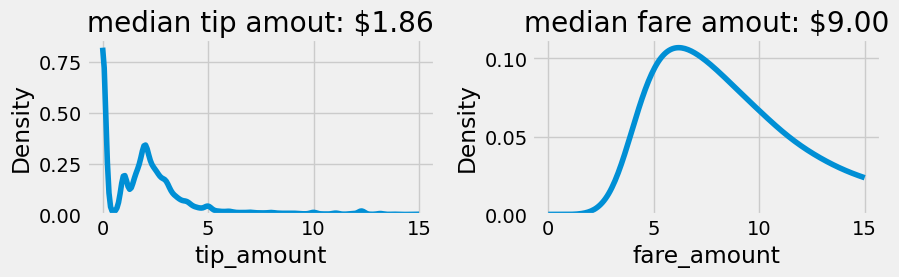

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
clip = [0, 15]

sns.kdeplot(data=taxi_df, x="tip_amount", ax=axs[0], clip=clip)
axs[0].set_title(f"median tip amout: ${taxi_df['tip_amount'].median():.2f}")

sns.kdeplot(data= taxi_df, x="fare_amount", ax=axs[1], clip=clip)
axs[1].set_title(f"median fare amout: ${taxi_df['fare_amount'].median():.2f}")

fig.tight_layout()

C:\Users\aayus\AppData\Local\Temp\ipykernel_1432\4131170292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  passenger_graph = sns.boxplot(x = 'passenger_count', y = 'time_difference', data = taxi_df,
C:\Users\aayus\AppData\Local\Temp\ipykernel_1432\4131170292.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  passenger_graph.set_yticklabels(labels = [-10, '0  ', '2000  ', '4000  ', '6000  ', '8000  ', '10000  ','12000 s'])


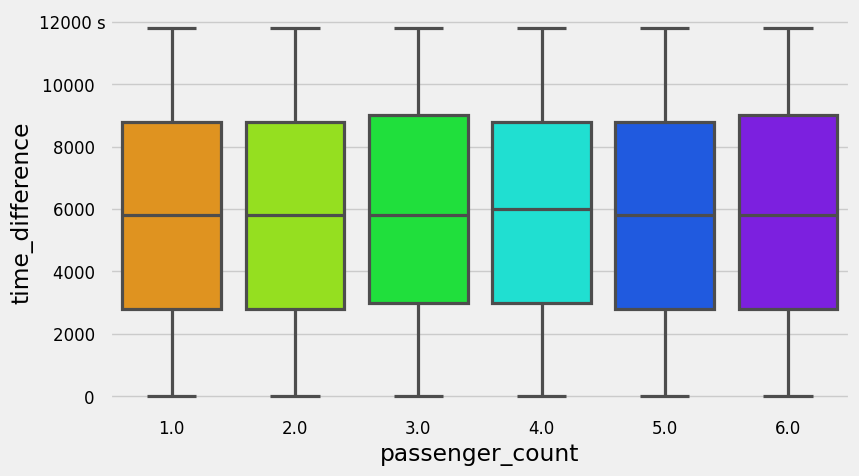

passenger_count,1.0,2.0,3.0,4.0,5.0,6.0
count,1.386950e+06,306720.000000,83908.000000,43678.000000,71265.000000,42361.000000
mean,2.943180e+01,29.446280,29.523430,29.511882,29.336013,29.484762
std,1.731367e+01,17.315725,17.312086,17.286918,17.353123,17.376116
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+01,14.000000,15.000000,15.000000,14.000000,14.000000
50%,2.900000e+01,29.000000,29.000000,30.000000,29.000000,29.000000
75%,4.400000e+01,44.000000,45.000000,44.000000,44.000000,45.000000
max,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000


In [96]:
matplotlib.style.use('fivethirtyeight')

# Create boxplot
plt.figure(figsize=(8.5,5))
passenger_graph = sns.boxplot(x = 'passenger_count', y = 'time_difference', data = taxi_df, 
                          palette = 'gist_rainbow', linewidth = 2.3)

# Customize tick size
passenger_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

# Customize tick labels of the y-axis
passenger_graph.set_yticklabels(labels = [-10, '0  ', '2000  ', '4000  ', '6000  ', '8000  ', '10000  ','12000 s'])

plt.show()

# Statistical summary
taxi_df.groupby('passenger_count')['time_difference'].describe().transpose()

<Axes: xlabel='pickup_hour', ylabel='time_difference'>

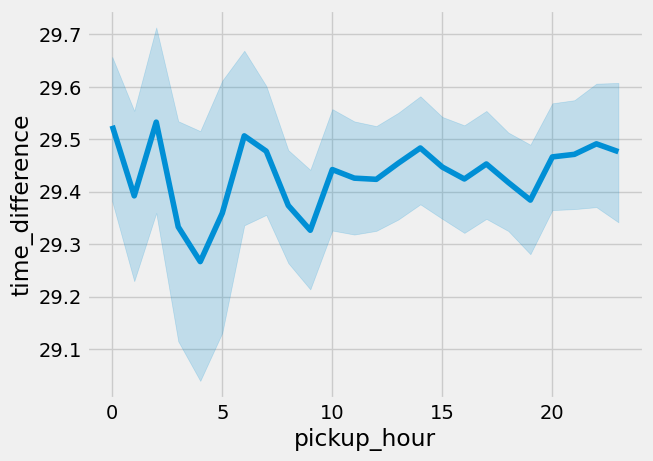

In [97]:
#Pickup hour vs trip duration
sns.lineplot(x='pickup_hour',y='time_difference',data=taxi_df)

<Axes: xlabel='pickup_hour', ylabel='trip_distance'>

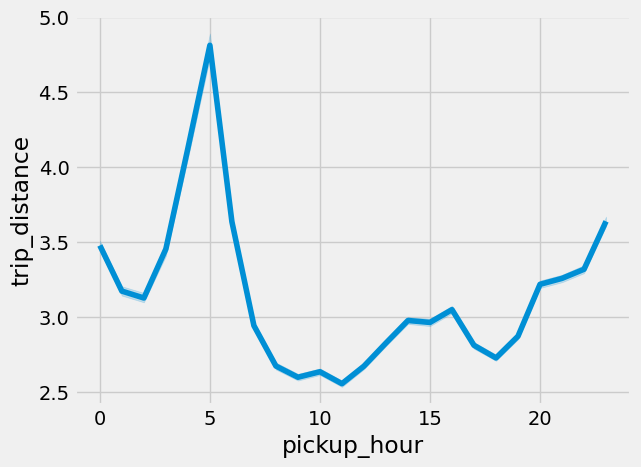

In [98]:
#Distance per hour of day
sns.lineplot(x='pickup_hour',y='trip_distance',data=taxi_df)

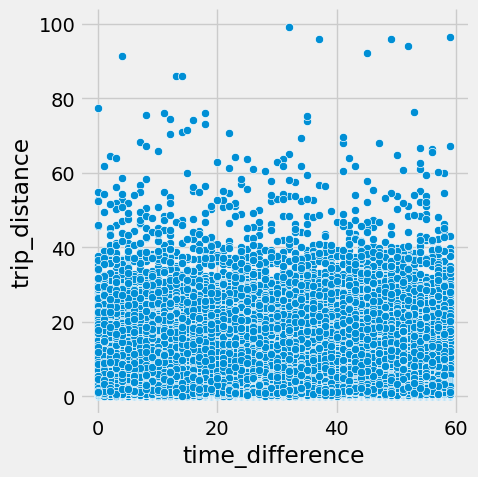

In [99]:
#Trip Duration and Distance
sns.relplot(y=taxi_df.trip_distance,x='time_difference',data=taxi_df)

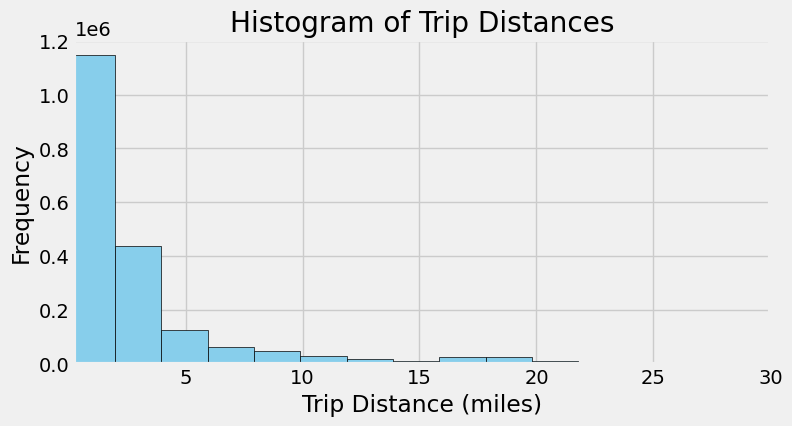

In [100]:
# Ploting a histogram of trip distances
plt.figure(figsize=(8, 4))
plt.hist(taxi_df['trip_distance'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0.25,30)
plt.show()

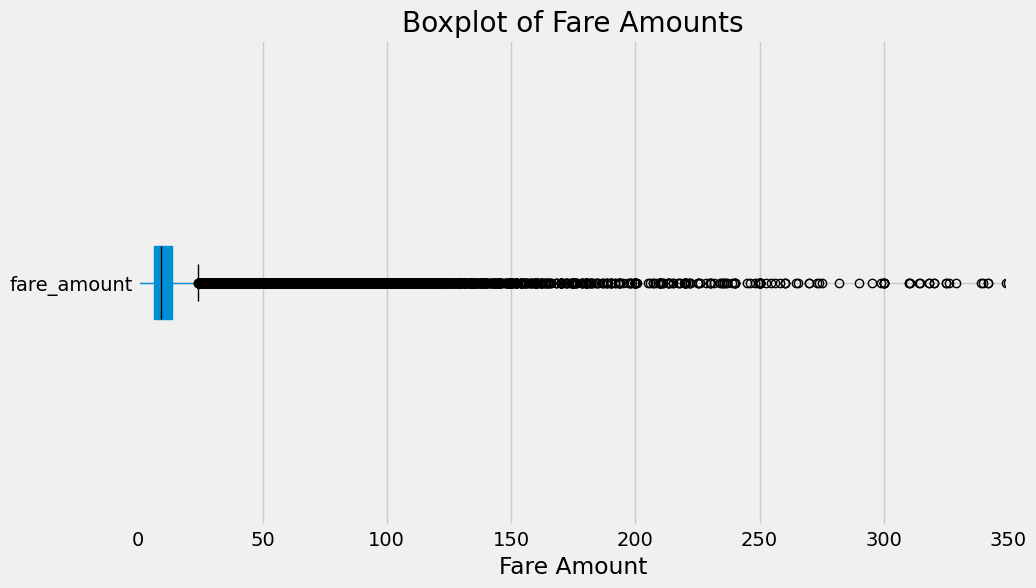

In [101]:
# Plot a boxplot of fare amounts
plt.figure(figsize=(10, 6))
taxi_df.boxplot(column='fare_amount', vert=False, patch_artist=True, medianprops={'color':'black'})
plt.title('Boxplot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.xlim(0,350)
plt.show()

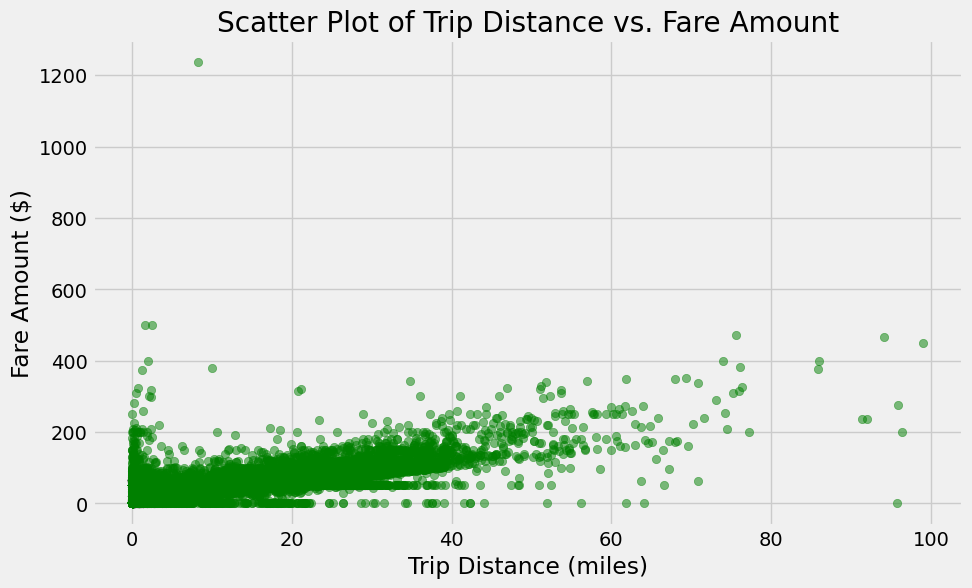

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_df['trip_distance'], taxi_df['fare_amount'], alpha=0.5, color='green')
plt.title('Scatter Plot of Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

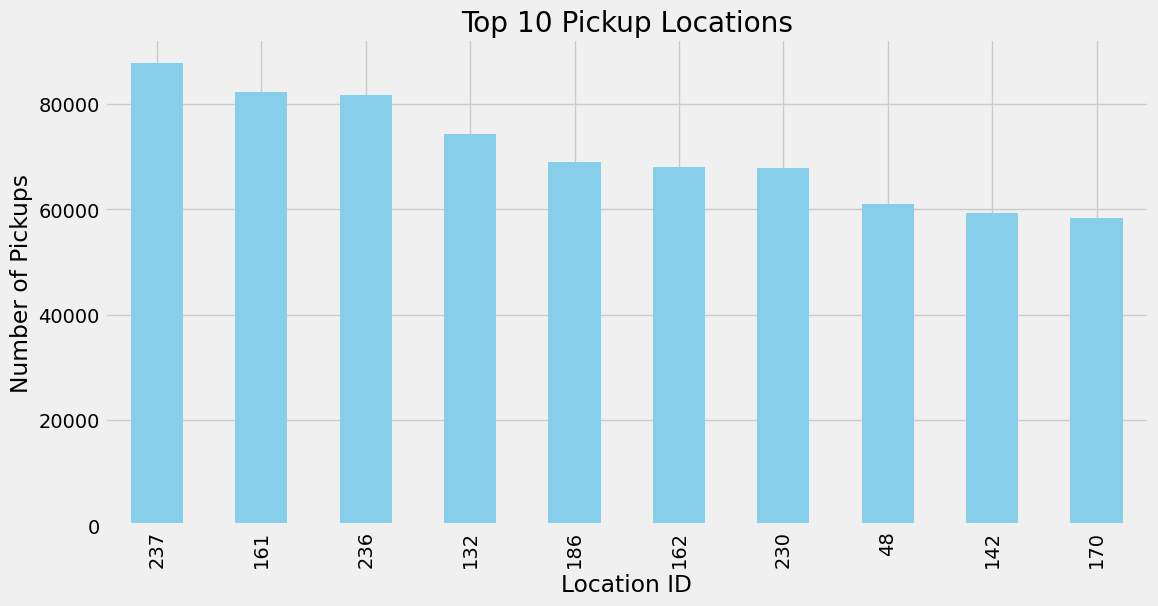

In [103]:
# Ploting a bar plot of the top 10 pickup locations
top_pickup_locations = taxi_df['pulocationid'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.show()

In [26]:
# Droping columns which are not necessary for The ML models

ML_fair_df=taxi_df.drop(['vendorid','passenger_count','tpep_pickup_datetime','tpep_dropoff_datetime',
                 'store_and_fwd_flag','ratecodeid','payment_type','fare_amount','extra','mta_tax',
                 'tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','time_difference'], axis=1)

In [27]:
ML_fair_df.head()

,trip_distance,pulocationid,dolocationid,total_amount,weekday_num,pickup_hour
0,1.2,238,239,11.27,2,0
1,1.2,239,238,12.30,2,0
2,0.6,238,238,10.80,2,0
3,0.8,238,151,8.16,2,0
4,0.0,193,193,4.80,2,0


In [28]:
# Looking at the data types

ML_fair_df.dtypes

trip_distance    float64
pulocationid       int64
dolocationid       int64
total_amount     float64
weekday_num        int32
pickup_hour        int32
dtype: object

In [29]:
#Spliting the data into test and train
# We are going to use trip distance, PULocationID, DOLocationID, Weekday number and Pickup Hour as the feature elements to predict Taxi fares
# passenger_count,PULocationID,DOLocationID,weekday_num,pickup_hour
x = ML_fair_df.iloc[:, [0,1,2,4,5]].values
y = ML_fair_df.iloc[:,3].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

In [30]:
# Running The Linear regression model

start_time = time.time()
lm_regression = LinearRegression()
lm_regression = lm_regression.fit(x_train, y_train)
end_time = time.time()
lm_time = (end_time - start_time)
print(f"Time taken to train linear regression model : {lm_time} seconds")

Time taken to train linear regression model : 0.2714853286743164 seconds


In [31]:
lm_regression_trips = lm_regression.predict(x_test)
# Generating prediction for Linear Regression model

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lm_regression_trips.flatten()})
predictions

,Actual,Predicted
0,39.80,51.431246
1,61.42,65.095562
2,18.30,16.498563
3,15.80,16.443691
4,11.00,12.703023
...,...,...
390837,7.80,9.925109
390838,12.80,13.774162
390839,18.96,16.042524
390840,34.90,26.927718


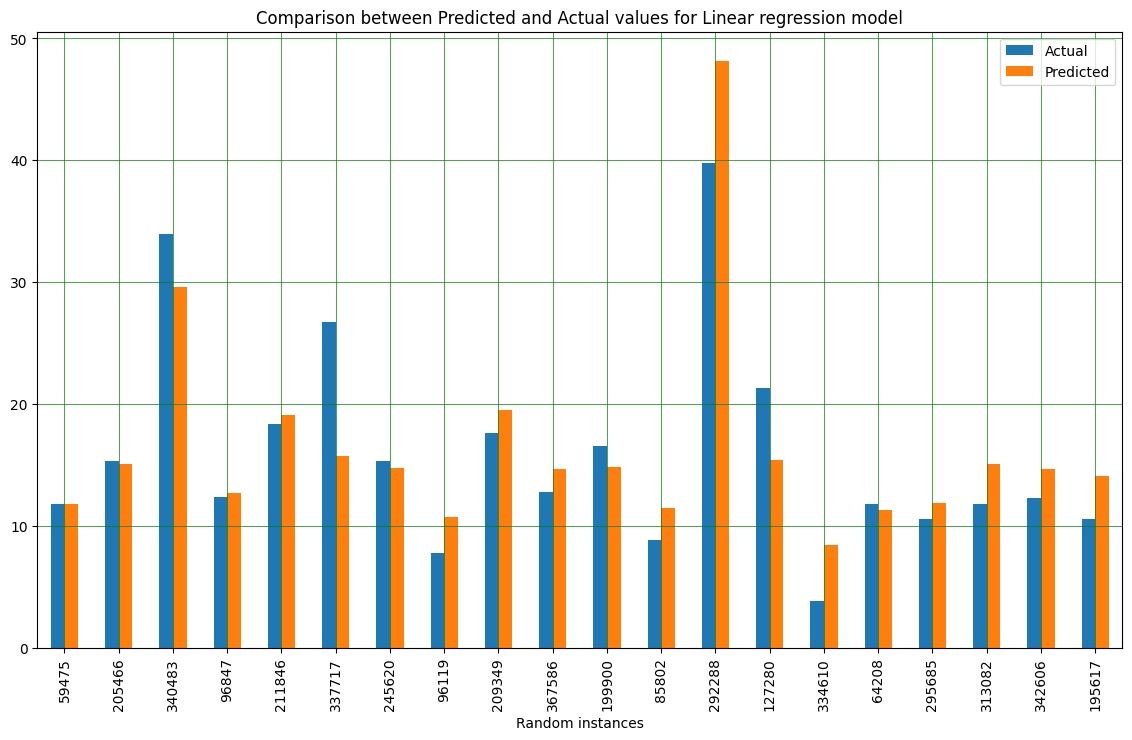

In [32]:
#Plotting Actuall vs Predicted Values

predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for Linear regression model")
plt.show()

In [33]:
#Getting The R Squared Value

lm_score = r2_score(y_test, lm_regression_trips)
print(lm_score)

0.765761044999981


In [34]:
# Running the Decision Tree Regressor

start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision tree model : {dt_time} seconds")

Time taken to train Decision tree model : 12.826615810394287 seconds


In [35]:
dt_regression_trips = dt_regression.predict(x_test)

In [36]:
# Generating prediction for Decission Tree Regressor model

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': dt_regression_trips.flatten()})
predictions

,Actual,Predicted
0,39.80,41.300000
1,61.42,69.596667
2,18.30,20.760000
3,15.80,17.150000
4,11.00,11.760000
...,...,...
390837,7.80,7.300000
390838,12.80,11.300000
390839,18.96,18.300000
390840,34.90,37.300000


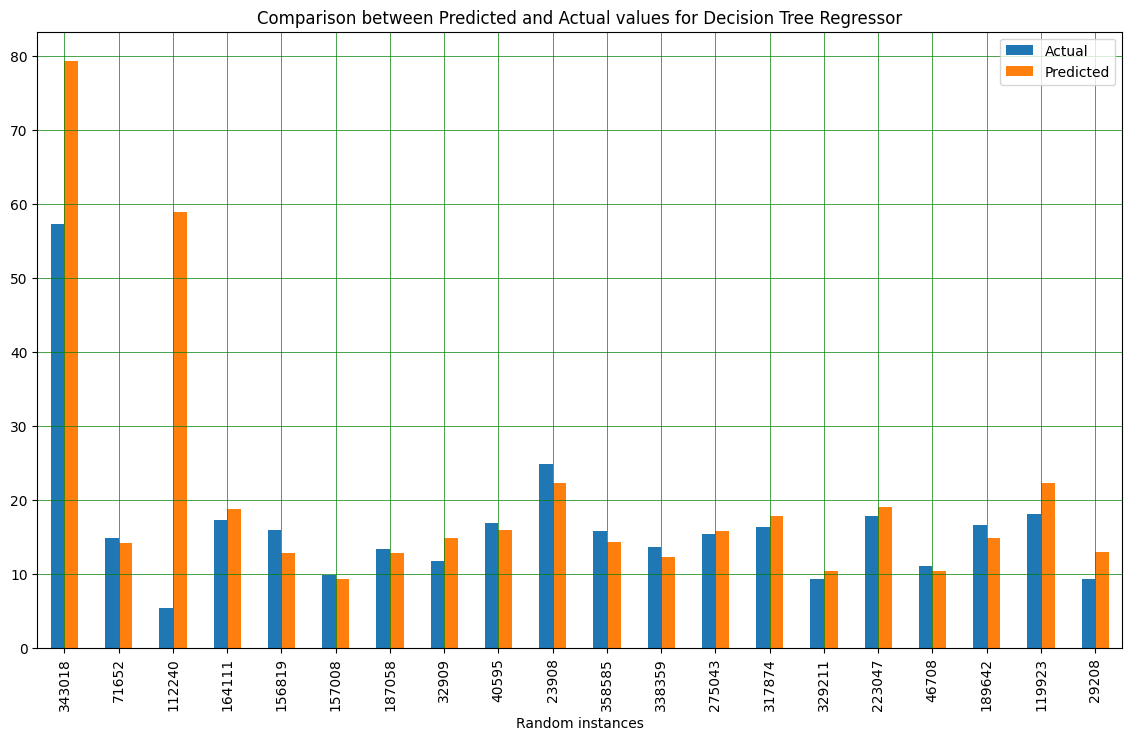

In [37]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for Decision Tree Regressor")
plt.show()

In [38]:
#Getting The R Squared Value

dt_score = r2_score(y_test, dt_regression_trips)
print(dt_score)

0.723358768551011


In [39]:
# Running The AdaBoostRegressor model

start_time = time.time()
ada_regression = AdaBoostRegressor()
ada_regression = ada_regression.fit(x_train, y_train)
end_time = time.time()
ad_time = (end_time - start_time)
print(f"Time taken to train AdaBoost model : {ad_time} seconds")

Time taken to train AdaBoost model : 28.671478748321533 seconds


In [40]:
ada_trips = ada_regression.predict(x_test)

In [41]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': ada_trips.flatten()})
predictions

,Actual,Predicted
0,39.80,45.221133
1,61.42,73.487618
2,18.30,17.906376
3,15.80,17.906376
4,11.00,17.906376
...,...,...
390837,7.80,17.906376
390838,12.80,17.906376
390839,18.96,17.906376
390840,34.90,27.784067


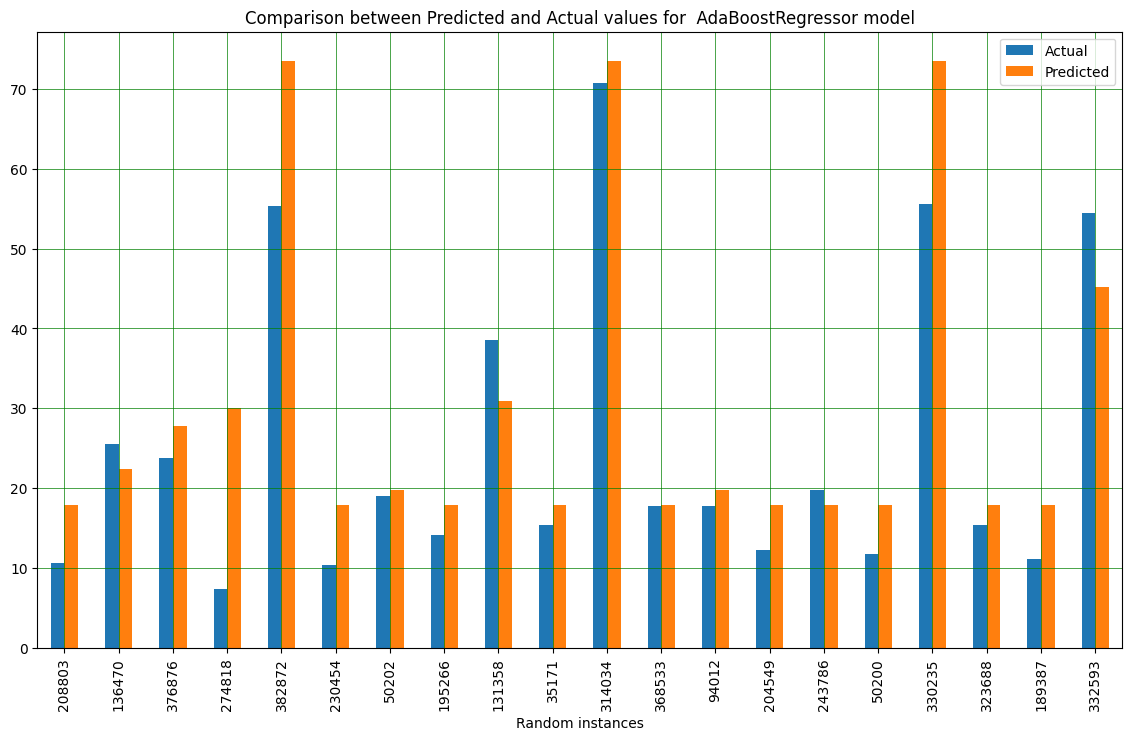

In [42]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for  AdaBoostRegressor model")
plt.show()

In [43]:
#Getting The R Squared Value

ad_score = r2_score(y_test, ada_trips)
print(ad_score)

0.41270066142075634


In [44]:
# Running The GradientBoostRegressor model

start_time = time.time()
gd_regression = GradientBoostingRegressor()
gd_regression = gd_regression.fit(x_train, y_train)
end_time = time.time()
gd_time = (end_time - start_time)
print(f"Time taken to train Gradient Boost model : {gd_time} seconds")

Time taken to train Gradient Boost model : 167.22589325904846 seconds


In [45]:
gd_trips = gd_regression.predict(x_test)

In [46]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': gd_trips.flatten()})
predictions

,Actual,Predicted
0,39.80,50.034449
1,61.42,70.286688
2,18.30,17.370795
3,15.80,16.804714
4,11.00,12.083754
...,...,...
390837,7.80,9.360428
390838,12.80,13.594609
390839,18.96,16.690903
390840,34.90,25.199804


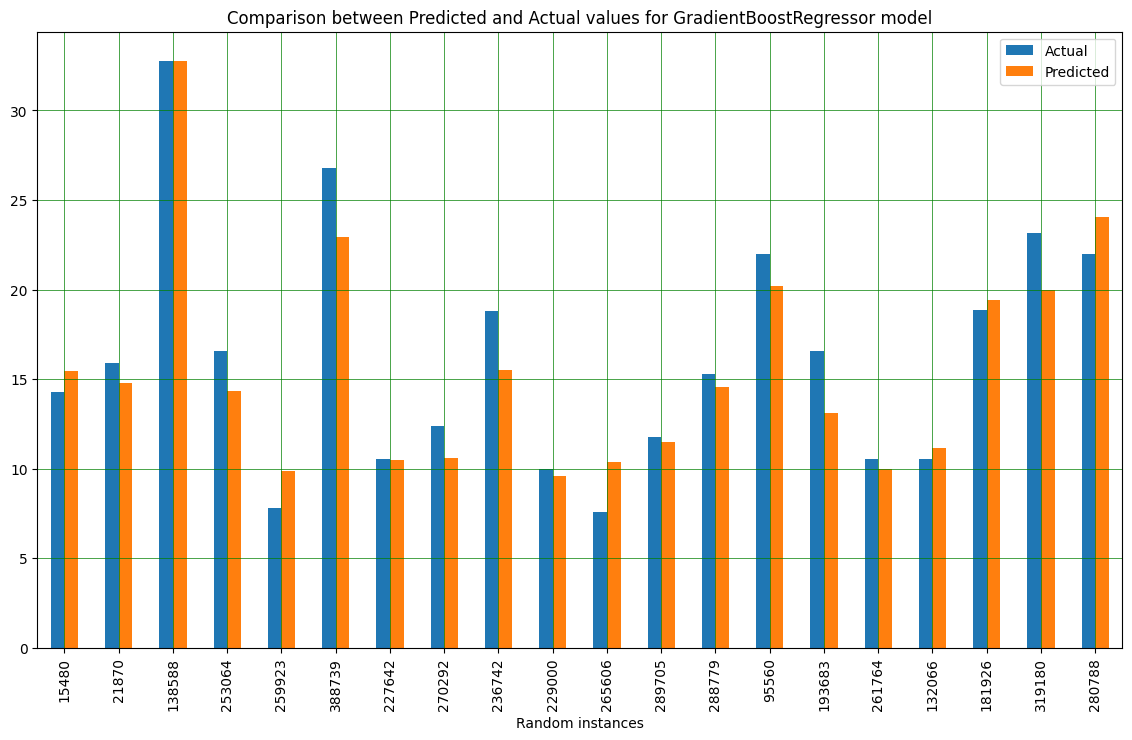

In [47]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for GradientBoostRegressor model")
plt.show()

In [48]:
#Getting The R Squared Value

gd_score = r2_score(y_test, gd_trips)
print(gd_score)

0.8421200942753375


In [49]:
# Running The XGBRegressor model

start_time = time.time()
xgb_regression = XGBRegressor(objective ='reg:squarederror')
xgb_regression = xgb_regression.fit(x_train, y_train)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost  model : {xgb_time} seconds")

Time taken to train XGBoost  model : 6.309848308563232 seconds


In [50]:
XGB_trips = xgb_regression.predict(x_test)

In [51]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': XGB_trips.flatten()})
predictions

,Actual,Predicted
0,39.80,45.945568
1,61.42,68.974281
2,18.30,18.446838
3,15.80,16.418720
4,11.00,11.842456
...,...,...
390837,7.80,9.291968
390838,12.80,13.190619
390839,18.96,17.412119
390840,34.90,26.556601


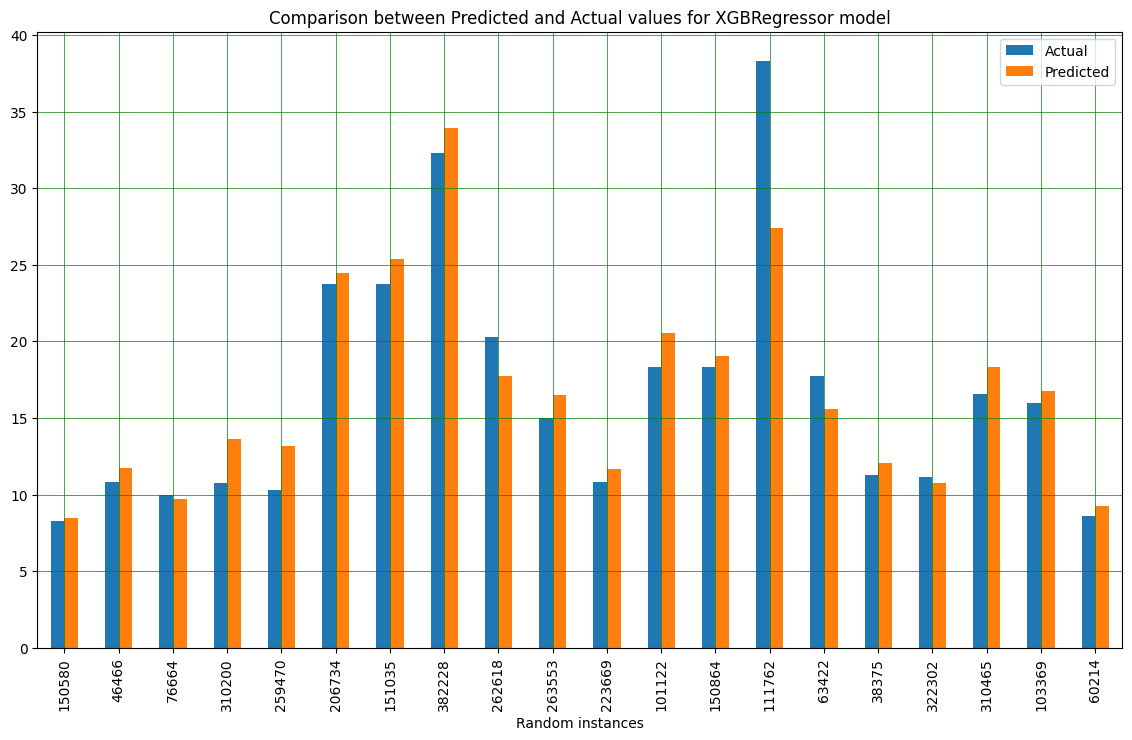

In [52]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for XGBRegressor model")
plt.show()

In [53]:
#Getting The R Squared Value

xgb_score = r2_score(y_test, XGB_trips)
print(xgb_score)

0.8486834723986569


In [54]:
# Creating Accuracy and Time Dataframe

#r2 = [lm_score, dt_score, ad_score, gd_score, xgb_score]
#tm = [lm_time, dt_time, ad_time, gd_time, xgb_time]
#comp = pd.DataFrame({'Time': tm, 'Accu': r2})

r2 = [lm_score, dt_score, gd_score, xgb_score]
tm = [lm_time, dt_time, gd_time, xgb_time]
comp = pd.DataFrame({'Time': tm, 'Accu': r2})

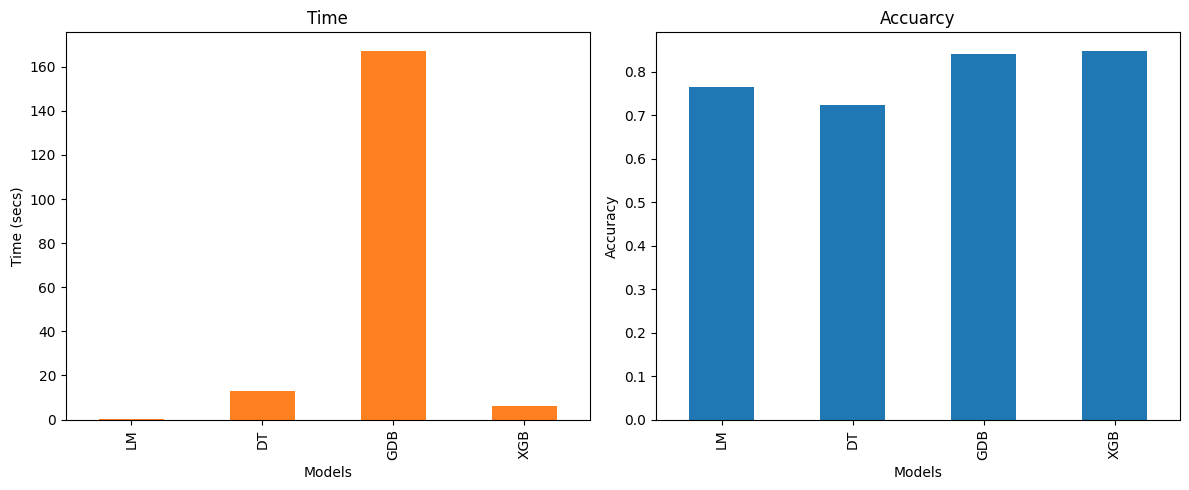

In [55]:
# Comparing All models based on time taken to implement and Accuracy

label = ['LM', 'DT', 'GDB', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comp['Time'].plot(kind='bar',title="Time",ax=axes[0],color = (1, 0.5, 0.13))
ax1 = comp['Accu'].plot(kind='bar',title="Accuarcy",ax=axes[1])
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()

In [56]:
Distance = 1.9
PULocationID = 138
DOLocationID = 7
WeekDay = 6
Hour = 7

answer = xgb_regression.predict([[Distance,PULocationID,DOLocationID,WeekDay,Hour]])
predicted_fare = ["%.2f"% elem for elem in answer]

if PULocationID == 132:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
elif PULocationID == 138:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
else:
    print(f'Your estimated fare is $',predicted_fare[0])



Your estimated fare is $ 12.42


In [57]:
taxi_zone_df.isnull().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [58]:
taxi_zone_df= taxi_zone_df.dropna()

In [59]:
taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [60]:
taxi_zone_df.loc[taxi_zone_df.LocationID == 7,'Zone'].values[0]

'Astoria'

In [61]:
taxi_zone_df['Borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'],
      dtype=object)

In [62]:
######Prediction Test##############


Distance = 2.9959013761935176
PULocation_tag = 'LaGuardia Airport'
DOLocation_tag = 'Astoria'
WeekDay = 6
Hour = 7

geocoder = Nominatim(user_agent="YTFP")
PULocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == PULocation_tag,('LocationID','Borough')]
PULocationID = PULocation_df['LocationID'].iloc[0]
PUlocation_zone = PULocation_df['Borough'].iloc[0]
PULocation = f"{PULocation_tag},{PUlocation_zone}"
coordinates_PU = geocoder.geocode(PULocation)
lat1,long1 = (coordinates_PU.latitude),(coordinates_PU.longitude)
place1=(lat1,long1)

DOLocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == DOLocation_tag,('LocationID','Borough')]
DOLocationID = DOLocation_df['LocationID'].iloc[0]
DOlocation_zone = DOLocation_df['Borough'].iloc[0]
DOLocation = f"{DOLocation_tag},{DOlocation_zone}"
coordinates_DO = geocoder.geocode(DOLocation)
lat2,long2 = (coordinates_DO.latitude),(coordinates_DO.longitude)
place2=(lat2,long2)

Distance_new = distance.distance(place1,place2).miles

answer = xgb_regression.predict([[Distance_new,PULocationID,DOLocationID,WeekDay,Hour]])
predicted_fare = ["%.2f"% elem for elem in answer]

if PULocationID == 132:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
elif PULocationID == 138:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
else:
    print(f'Your estimated fare is $',predicted_fare[0])
    

Your estimated fare is $ 14.69


In [63]:
############################################# GUI for Fare Predictor #############################################

def predict():
    global Prediction_label
    Prediction_label.pack_forget()
    PULocation_tag = PULocation_entry.get()
    DOLocation_tag = DOLocation_entry.get()
    WeekDay = int(Weekday_entry.get())
    Hour = int(Time_entry.get())
    
    
    geocoder = Nominatim(user_agent="YTFP")
    PULocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == PULocation_tag,('LocationID','Borough')]
    PULocationID = PULocation_df['LocationID'].iloc[0]
    PUlocation_zone = PULocation_df['Borough'].iloc[0]
    PULocation = f"{PULocation_tag},{PUlocation_zone}"
    coordinates_PU = geocoder.geocode(PULocation)
    lat1,long1 = (coordinates_PU.latitude),(coordinates_PU.longitude)
    place1=(lat1,long1)
    
    DOLocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == DOLocation_tag,('LocationID','Borough')]
    DOLocationID = DOLocation_df['LocationID'].iloc[0]
    DOlocation_zone = DOLocation_df['Borough'].iloc[0]
    DOLocation = f"{DOLocation_tag},{DOlocation_zone}"
    coordinates_DO = geocoder.geocode(DOLocation)
    lat2,long2 = (coordinates_DO.latitude),(coordinates_DO.longitude)
    place2=(lat2,long2)
    
    Distance = distance.distance(place1,place2).miles
    
    xgb_regression = XGBRegressor(objective ='reg:squarederror')
    xgb_regression = xgb_regression.fit(x_train, y_train)
    answer = xgb_regression.predict([[Distance,PULocationID,DOLocationID,WeekDay,Hour]])
    predicted_fare = ["%.2f"% elem for elem in answer]

    if PULocationID == 132:
        predictedfare = float(predicted_fare[0])
        fare= predictedfare + 1.25
        Prediction_label = Label(window,text=(f'Your estimated fare is ${fare}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()
    elif PULocationID == 138:
        predictedfare = float(predicted_fare[0])
        fare= predictedfare + 1.25
        Prediction_label = Label(window,text=(f'Your estimated fare is ${fare}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()
    else:
        Prediction_label = Label(window,text=(f'Your estimated fare is ${fare}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()



#Window 
window = tk.Tk()
window.title('Fare Predictor')
window.geometry("300x500")
window.minsize(350,400)
window.maxsize(600,650)
small_icon = tk.PhotoImage(file="taxi_small.png")
large_icon = tk.PhotoImage(file="taxi_big.png")
window.iconphoto(False, large_icon, small_icon)
window.configure(bg='black')


Title_label = Label(text = 'YELLOW TAXI FAIR PREDICTION', bg = 'black',fg = 'yellow',font=("Arial",15,"bold"))
Title_label.pack(pady=20)

PULocation_lable = Label(window,text='PICK UP LOCATION',bg='black',fg='yellow',font=("Arial",15,"bold"))
PULocation_lable.pack()

PULocation_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
PULocation_entry.pack(pady=5)

DOLocation_lable = Label(window,text='DROP OFF LOCATION',bg='black',fg='yellow',font=("Arial",15,"bold"))
DOLocation_lable.pack()

DOLocation_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
DOLocation_entry.pack(pady=5)

Weekday_lable = Label(window,text='DAY OF THE WEEK',bg='black',fg='yellow',font=("Arial",15,"bold"))
Weekday_lable.pack()

Weekday_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
Weekday_entry.pack(pady=5)

Time_lable = Label(window,text='TIME',bg='black',fg='yellow',font=("Arial",15,"bold"))
Time_lable.pack()

Time_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
Time_entry.pack(pady=5)

Predict_button = Button(window,text='PREDICT',width=15,font=("Arial",14),bg="yellow",fg="black",command=predict)
Predict_button.pack(pady=5)

Prediction_label = Label(window,bg='black',fg='yellow',font=("Arial",15,"bold"))
Prediction_label.pack()

window.mainloop()